In [1]:
from __future__ import division

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.patches import Rectangle

% matplotlib inline

In [57]:
length = 8 # choose between 8, 9 12 and 13

aggregated_file = '06 Aggregated dR RT Streptavidin length 8 and 9.csv'

# Base peptide sequences

In [58]:
if   length == 8:
    base = 'WTHPQFAT'
elif length == 9:
    base = 'LQWHPQAGK'
elif length == 12:
    base = 'GKFPIPLGKQSG'
elif length == 13:
    base = 'NGQFQVWIPGAQK'
else:
    print 'No base of such length'
    
aminoacids = ['A', 'C', 'D', 'E', 'F',
              'G', 'H', 'I', 'K', 'L',
              'M', 'N', 'P', 'Q', 'R',
              'S', 'T', 'V', 'W', 'Y']

# Creating list of peptide names

In [5]:
def namelist(base, n):
    names = []
    for a in aminoacids:
        names.append(base[:n - 1] + a + base[n:])
    return names

# Subsetting data

In [6]:
def reorder(data, names):
    # moves base peptide row to the first position
    base_index = data[data['Peptide'] == base].index[0]
    reindex = [-1 if x == base_index else x for x in data.index]
    data.index = reindex
    data = data.sort_index()
    return data

In [7]:
def rename(data, base, n):
    names = data['Peptide']
    new_names = []
    for name in names:
        if name == base:
            new_names.append(name)
        else:
            new_names.append('-'*(n - 1) + name[n-1] + '-'*(len(base)-n))
    data['Peptide'] = new_names
    return data

In [49]:
def subset(base, n):
    names = namelist(base, n)
    data = pd.read_csv(aggregated_file, header = 0)
    data = data[data['Peptide Length'] == len(base)]
    data = data[data['Peptide'].isin(names)]
    assert len(data) == 20
#     data = reorder(data, names)
    data = rename(data, base, n)    
    return data

In [54]:
def plot_series(data, n, filename):
    
    # creating numerical arrays for data, errorbars and styles

    x       = np.array(np.log10(data['Ka Final']))
    xlo     = np.array(np.log10(data['Ka Final Lower']))
    xhi     = np.array(np.log10(data['Ka Final Upper']))

    ylabels = data['Peptide'].tolist()
    y       = range(len(ylabels), 0, -1)

    xlolims = [e ==  np.inf for e in xhi]
    xuplims = [e == -np.inf for e in xlo]

    xlim_left = 4
    xlim_right = 11

    color      = ['k']    * len(x)
    marker     = ['None'] * len(x)
    markersize = [6]      * len(x)
    thickness  = [2]    * len(x)
    capsize    = [4]      * len(x)

    for i in range(len(x)):
        # upper limits
        if  xlo[i] == -np.inf:
            xlo[i]        = xlim_left
#             color[i]      = 'r'
            marker[i]     = '<'
            markersize[i] = 12
            thickness[i]  = 1.2
            capsize[i]    = 3
#       # lower limits
        elif xhi[i] == np.inf:
            xhi[i]        = xlim_right
#             color[i]      = 'r'
            marker[i]     = '>'
            markersize[i] = 12
            thickness[i]  = 1.2
            capsize[i]    = 3
 
    xbar_lo = x - xlo
    xbar_hi = xhi - x

    # start plotting
    
    width = 6
    height = 0.36 * (len(y) + 1.4) + 1.1

    fig = plt.figure(figsize = (width, height))

    plt.yticks(y, ylabels)
    plt.xticks(range(4, 12, 2))
    plt.grid(alpha = 0.5)

    plt.subplots_adjust(left   =     2.5 / width,
                        right  = 1 - 0.3 / width,
                        bottom =     0.8 / height,
                        top    = 1 - 0.3 / height)

    plt.axvspan(-5, np.log10(1/0.00003) + 0.1, alpha = 0.1, facecolor = 'k', edgecolor = 'none')       
    
    # plot data
    
    ax = fig.add_subplot(1, 1, 1)

    for i in range(len(x)):
        # plot points
        ax.errorbar(x[i], y[i],
                    xerr = [[xbar_lo[i]], [xbar_hi[i]]],
                    xlolims = xlolims[i],
                    xuplims = xuplims[i],

                    marker = marker[i],
                    color = color[i],
                    markersize = markersize[i],
                    capthick = thickness[i],
                    linewidth = thickness[i],
                    capsize = capsize[i],
                    ls = 'none',
                    markeredgecolor = 'none')

        # x axis labels
        for label in ax.get_xticklabels(): 
            label.set_fontname('DejaVu Sans Mono')
            label.set_fontsize(36)

        # y axis labels
        for label in ax.get_yticklabels():
            label.set_fontname('DejaVu Sans Mono') 
            label.set_fontsize(30)

#             if label.get_text() == base:
#                 label.set_weight('black')

#             else:
#                 label.set_color('0.2')

        # axis limits
        ax.set_xlim(left = xlim_left, right = xlim_right)
        ax.set_ylim(bottom = min(y) - 0.7, top = max(y) + 0.7)

        # axis ticks
        for tick in ax.get_xaxis().get_major_ticks():
            tick.set_pad(6)
        for tick in ax.get_yaxis().get_major_ticks():
            tick.set_pad(8)

#     plt.show()
    plt.savefig(filename)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log10


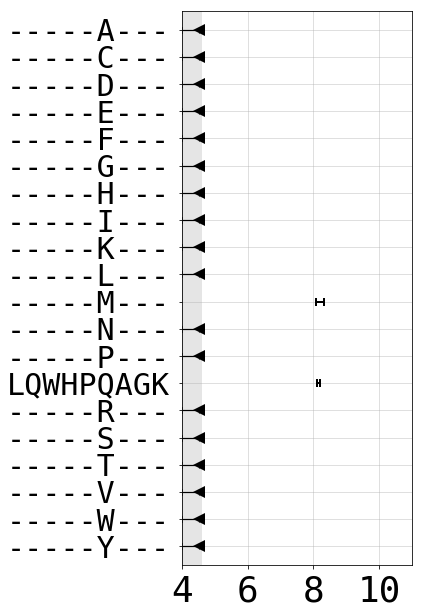

In [55]:
n = 6
plot_series(subset(base, n), n, 'a')

# Important note about handling error bars
In total, I have four types of data points on my plots:

- Normal points. These are reactive peptides, for which $K_d^{(best)} = K_d$. Fitting parameter $K_a = \dfrac{1}{K_d^{(best)}}$ is a true value of association constant and the errorbar is smaller than the value itself. Such points are plotted in black.


- Normal points with large errorbars. Just like in previous category, $K_d^{(best)} = K_d$, but this time fitting error of the $K_d$ (and $K_a$) is larger than fitted value of $K_d$ (or $K_a$) itself. Errorbar would go all the way to zero on the normal plot of $K_d$ and all the way to $\infty$ on the plot of $K_a$. I chose to plot such points as **lower boundaries** of $K_a$ with red triangle at $K_a + \text{Err }(K_a)$ and a range line stretching right.


- Non-reactive peptides. These points are plotted as red triangles at the detection limit of $K_a = 30000 \text{ nM}$ with a line stretching left. Detection limit of association constant provides an **upper boundary** for $K_a$.


- Points with $k_{off}$ below detection limit. For these points $K_d^{(best)} > K_d$. Fitted value of $K_d$ is below detection limit of dissociation rate and does not represent true dissociation constant. We should use $K_a = \dfrac{1}{K_d^{(best)}}$ as **lower limit** of association constant. Since $\text{Err }(K_d)$ is an error of fitted dissociation constant, which is not accurate, I ignore this errorbar altogether.

In [59]:
for i in range(1, length + 1):
    filename = 'base ' + str(length) + ', letter ' + str(i) + '.png'
    plot_series(subset(base, i), i, filename)
    
plt.clf()
plt.close('all')

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log10


In [201]:
# df = subset(base, 2)

In [202]:
# n = 6
# plot_series(subset(base, n), n, 'a')